<a href="https://colab.research.google.com/github/somayehpakdel/predicting_air_pollution_measurements/blob/main/predicting_air_pollution_measurements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Downloading Dataset From Kaggle And Copy it to GoogleDrive

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas
od.download('https://www.kaggle.com/competitions/tabular-playground-series-jul-2021/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pakdel1991
Your Kaggle Key: ··········


100%|██████████| 264k/264k [00:00<00:00, 17.7MB/s]


Extracting archive ./tabular-playground-series-jul-2021/tabular-playground-series-jul-2021.zip to ./tabular-playground-series-jul-2021


In [ ]:
%cp -r /content/tabular-playground-series-jul-2021 /content/drive/MyDrive/Datasets/Kaggle-Datasets

## installation

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 30.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.3/83.3 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 16.4 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import dtreeviz
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

##Fastai Course

In [ ]:
import pathlib
path=pathlib.Path('/content/gdrive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021')
path.ls()

(#4) [Path('/content/gdrive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021/sample_submission.csv'),Path('/content/gdrive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021/test.csv'),Path('/content/gdrive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021/train.csv'),Path('/content/gdrive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021/Project_fastai')]

In [ ]:
df=pd.read_csv(path/'train.csv')
#df=df.drop('target_benzene',axis=1)
print(df.columns)

Index(['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'],
      dtype='object')


In [ ]:
[print(df.columns[i],len(df[df.columns[i]].unique())) for i in range(len(df.columns))];

date_time 7111
deg_C 408
relative_humidity 762
absolute_humidity 5451
sensor_1 3882
sensor_2 4254
sensor_3 4251
sensor_4 4655
sensor_5 4839
target_carbon_monoxide 95
target_benzene 405
target_nitrogen_oxides 3268


In [ ]:
df.describe()

,deg_C,relative_humidity,absolute_humidity,sensor_1,...,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
count,7111.000000,7111.000000,7111.000000,7111.000000,...,7111.000000,7111.000000,7111.000000,7111.000000
mean,20.878034,47.561004,1.110309,1091.572100,...,998.335565,2.086219,10.237083,204.066784
std,7.937917,17.398731,0.398950,218.537554,...,381.537695,1.447109,7.694426,193.927723
min,1.300000,8.900000,0.198800,620.300000,...,242.700000,0.100000,0.100000,1.900000
25%,14.900000,33.700000,0.855900,930.250000,...,722.850000,1.000000,4.500000,76.450000
50%,20.700000,47.300000,1.083500,1060.500000,...,928.700000,1.700000,8.500000,141.000000
75%,25.800000,60.800000,1.404150,1215.800000,...,1224.700000,2.800000,14.200000,260.000000
max,46.100000,90.800000,2.231000,2088.300000,...,2594.600000,12.500000,63.700000,1472.300000


In [ ]:
dep_var='target_carbon_monoxide'
df[dep_var] = np.log(df[dep_var]+1)

In [ ]:
df=add_datepart(df,'date_time')

In [ ]:
print(len(df.columns))
df.columns

24


Index(['deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides',
       'date_timeYear', 'date_timeMonth', 'date_timeWeek', 'date_timeDay',
       'date_timeDayofweek', 'date_timeDayofyear', 'date_timeIs_month_end',
       'date_timeIs_month_start', 'date_timeIs_quarter_end',
       'date_timeIs_quarter_start', 'date_timeIs_year_end',
       'date_timeIs_year_start', 'date_timeElapsed'],
      dtype='object')

In [ ]:
df_test=pd.read_csv(path/'test.csv')
df_test=add_datepart(df_test,'date_time')
print(len(df_test.columns))

21


In [ ]:
' '.join(o for o in df.columns if o.startswith('date'))

'date_timeYear date_timeMonth date_timeWeek date_timeDay date_timeDayofweek date_timeDayofyear date_timeIs_month_end date_timeIs_month_start date_timeIs_quarter_end date_timeIs_quarter_start date_timeIs_year_end date_timeIs_year_start date_timeElapsed'

In [ ]:
print(df['date_timeYear'].unique())
print(df_test['date_timeYear'].unique())
print(df['date_timeYear'])
print(df['date_timeMonth'])

[2010 2011]
[2011]
0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
7106    2010
7107    2010
7108    2010
7109    2010
7110    2011
Name: date_timeYear, Length: 7111, dtype: int64
0        3
1        3
2        3
3        3
4        3
        ..
7106    12
7107    12
7108    12
7109    12
7110     1
Name: date_timeMonth, Length: 7111, dtype: int64


In [ ]:
cond=(df.date_timeYear==2010) & (df.date_timeMonth<12)
train_idx=np.where( cond)[0]
valid_idx=np.where(~cond)[0]
print(train_idx.shape,valid_idx.shape)
splits=(list(train_idx),list(valid_idx))

(6366,) (745,)


In [ ]:
dep_var='target_carbon_monoxide'
cont,cat = cont_cat_split(df,1,dep_var=dep_var)
print('continuouse',cont)
print('categorical',cat)
procs=[Categorify,FillMissing]
to=TabularPandas(df,procs,cat,cont,y_names=dep_var,splits=splits)

continuouse ['deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'target_benzene', 'target_nitrogen_oxides', 'date_timeYear', 'date_timeMonth', 'date_timeWeek', 'date_timeDay', 'date_timeDayofweek', 'date_timeDayofyear', 'date_timeElapsed']
categorical ['date_timeIs_month_end', 'date_timeIs_month_start', 'date_timeIs_quarter_end', 'date_timeIs_quarter_start', 'date_timeIs_year_end', 'date_timeIs_year_start']


In [ ]:
len(to.train),len(to.valid)

(6366, 745)

In [ ]:
to.show(5)

,date_timeIs_month_end,date_timeIs_month_start,date_timeIs_quarter_end,date_timeIs_quarter_start,date_timeIs_year_end,date_timeIs_year_start,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_benzene,target_nitrogen_oxides,date_timeYear,date_timeMonth,date_timeWeek,date_timeDay,date_timeDayofweek,date_timeDayofyear,date_timeElapsed,target_carbon_monoxide
0,False,False,False,False,False,False,13.1,46.000000,0.7578,1387.199951,1087.800049,1056.000000,1742.800049,1293.400024,12.0,167.699997,2010,3,10,10,2,69,1.268244e+09,1.252763
1,False,False,False,False,False,False,13.2,45.299999,0.7255,1279.099976,888.200012,1197.500000,1449.900024,1010.900024,9.9,98.900002,2010,3,10,10,2,69,1.268248e+09,1.131402
2,False,False,False,False,False,False,12.6,56.200001,0.7502,1331.900024,929.599976,1060.199951,1586.099976,1117.000000,9.2,127.099998,2010,3,10,10,2,69,1.268251e+09,1.163151
3,False,False,False,False,False,False,11.0,62.400002,0.7867,1321.000000,929.000000,1102.900024,1536.500000,1263.199951,9.7,177.199997,2010,3,10,10,2,69,1.268255e+09,1.163151
4,False,False,False,False,False,False,11.9,59.000000,0.7888,1272.000000,852.700012,1180.900024,1415.500000,1132.199951,6.4,121.800003,2010,3,10,10,2,69,1.268258e+09,0.916291


In [ ]:
to.items.head(5)

,deg_C,relative_humidity,absolute_humidity,sensor_1,...,date_timeIs_quarter_start,date_timeIs_year_end,date_timeIs_year_start,date_timeElapsed
0,13.1,46.000000,0.7578,1387.199951,...,1,1,1,1.268244e+09
1,13.2,45.299999,0.7255,1279.099976,...,1,1,1,1.268248e+09
2,12.6,56.200001,0.7502,1331.900024,...,1,1,1,1.268251e+09
3,11.0,62.400002,0.7867,1321.000000,...,1,1,1,1.268255e+09
4,11.9,59.000000,0.7888,1272.000000,...,1,1,1,1.268258e+09


In [ ]:
to.classes

{'date_timeIs_month_end': ['#na#', False, True],
 'date_timeIs_month_start': ['#na#', False, True],
 'date_timeIs_quarter_end': ['#na#', False, True],
 'date_timeIs_quarter_start': ['#na#', False, True],
 'date_timeIs_year_end': ['#na#', False],
 'date_timeIs_year_start': ['#na#', False]}

In [ ]:
save_pickle('/content/drive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021/Project_fastai/to1.pkl',to)

In [ ]:
path_to='/content/drive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021/Project_fastai/to1.pkl'
to=load_pickle(path_to)

In [ ]:
xs,y=to.train.xs,to.train.y
valid_xs,valid_y=to.valid.xs,to.valid.y
m=DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs,y)

DecisionTreeRegressor(max_leaf_nodes=4)

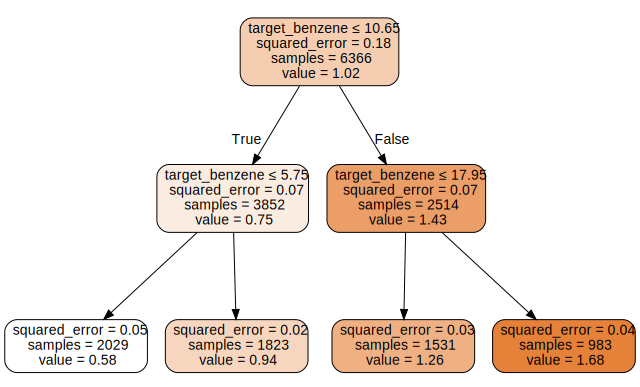

In [ ]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

In [ ]:
!pip install -q dtreeviz

In [ ]:
import dtreeviz

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


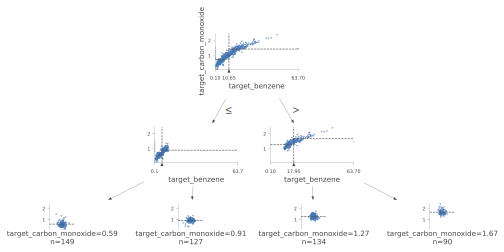

In [ ]:
dep_var='target_carbon_monoxide'
samp_idx = np.random.permutation(len(y))[:500]
viz_model=dtreeviz.model(m, X_train=xs.iloc[samp_idx],y_train=y.iloc[samp_idx]
               ,feature_names=xs.columns,target_name=dep_var)
viz_model.view(scale=0.8)

In [ ]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [ ]:
m_rmse(m, xs, y),m_rmse(m, valid_xs, valid_y)

(0.186056, 0.410168)

As we can see target_benzene is predicting the target alone. let's put aside this feature and repeat the processing.

In [ ]:
print(df.columns)
df_without_tb=df.drop('target_benzene',axis=1)
print(df_without_tb.columns)

Index(['deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides',
       'date_timeYear', 'date_timeMonth', 'date_timeWeek', 'date_timeDay',
       'date_timeDayofweek', 'date_timeDayofyear', 'date_timeIs_month_end',
       'date_timeIs_month_start', 'date_timeIs_quarter_end',
       'date_timeIs_quarter_start', 'date_timeIs_year_end',
       'date_timeIs_year_start', 'date_timeElapsed'],
      dtype='object')
Index(['deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_nitrogen_oxides', 'date_timeYear',
       'date_timeMonth', 'date_timeWeek', 'date_timeDay', 'date_timeDayofweek',
       'date_timeDayofyear', 'date_timeIs_month_end',
       'date_timeIs_month_start', 'date_timeIs_quarter_end',
       'date_timeIs_quarter_start', 'date_timeIs_year_

In [ ]:
cont,cat = cont_cat_split(df_without_tb,dep_var=dep_var)
to_without_tb=TabularPandas(df_without_tb,cat,cont,y_names=dep_var,splits=splits)
xs,y=to_without_tb.train.xs,to_without_tb.train.y
valid_xs,valid_y=to_without_tb.valid.xs,to_without_tb.valid.y
m=DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs,y)

DecisionTreeRegressor(max_leaf_nodes=4)

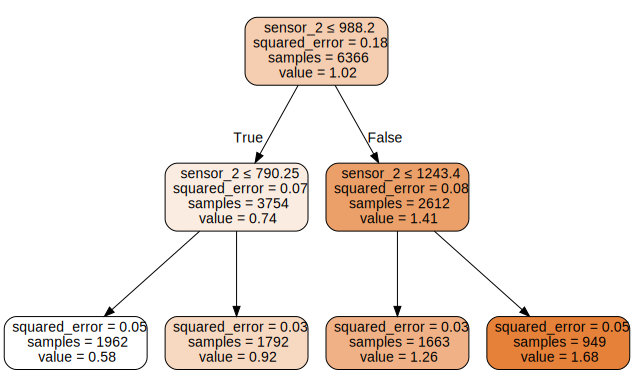

In [ ]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


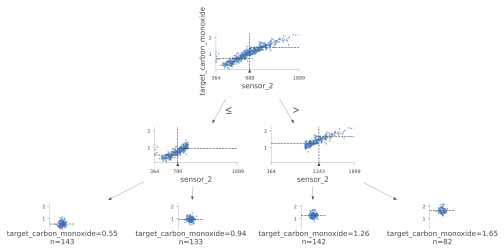

In [ ]:
dep_var='target_carbon_monoxide'
samp_idx = np.random.permutation(len(y))[:500]
viz_model=dtreeviz.model(m, X_train=xs.iloc[samp_idx],y_train=y.iloc[samp_idx]
               ,feature_names=xs.columns,target_name=dep_var)
viz_model.view(scale=0.8)

In [ ]:
m_rmse(m, xs, y),m_rmse(m, valid_xs, valid_y)

(0.193712, 0.411703)

In [ ]:
m = DecisionTreeRegressor()
m.fit(xs, y)
print(m_rmse(m, xs, y))
m_rmse(m, valid_xs, valid_y)

0.0


0.297101

In [ ]:
m.get_n_leaves(), len(xs)

(4039, 6366)

In [ ]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(xs, y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y),m.get_n_leaves()

(0.101155, 0.23923, 196)

In [ ]:
def rf(xs, y, n_estimators=40, max_samples=1500,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [ ]:
m = rf(xs, y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.094233, 0.257366)

In [ ]:
r_mse(m.oob_prediction_, y)

0.105712

In [ ]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])
print(preds.shape)
preds_std = preds.std(0)
print(preds_std[:5])

(40, 745)
[0.13096403 0.14649835 0.10983101 0.104189   0.10728924]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has fea

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [ ]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
14,target_benzene,0.411000
10,sensor_2,0.297633
9,sensor_1,0.113126
13,sensor_5,0.081628
15,target_nitrogen_oxides,0.050683
8,absolute_humidity,0.011474
11,sensor_3,0.008429
6,deg_C,0.004560
12,sensor_4,0.004501
22,date_timeElapsed,0.004118


In [ ]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

7

In [ ]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [ ]:
m = rf(xs_imp, y)
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.094581, 0.243081)

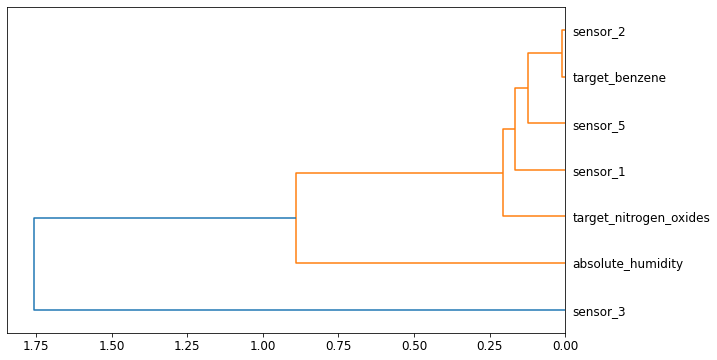

In [ ]:
cluster_columns(xs_imp)

In [ ]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
        max_samples=1500, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

In [ ]:
get_oob(xs_imp)

0.9324881577052364

In [ ]:
xs_imp.columns

Index(['target_benzene', 'sensor_2', 'sensor_1', 'sensor_5',
       'target_nitrogen_oxides', 'absolute_humidity', 'sensor_3'],
      dtype='object')

In [ ]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in xs_imp.columns}

{'target_benzene': 0.9266491826306859,
 'sensor_2': 0.934072880877876,
 'sensor_1': 0.9269911948338038,
 'sensor_5': 0.9332465790246945,
 'target_nitrogen_oxides': 0.9216833203242285,
 'absolute_humidity': 0.930501925597701,
 'sensor_3': 0.9333656314127612}

In [ ]:
to_drop = ['target_benzene']
get_oob(xs_imp.drop(to_drop, axis=1))

0.9269143639351044

In [ ]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)
save_pickle('/content/drive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021/Project_fastai/xs_final.pkl', xs_final)
save_pickle('/content/drive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021/Project_fastai/valid_xs_final.pkl', valid_xs_final)

In [ ]:
xs_final = load_pickle('/content/drive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021/Project_fastai/xs_final.pkl')
valid_xs_final = load_pickle('/content/drive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021/Project_fastai/valid_xs_final.pkl')

In [ ]:
m = rf(xs_final, y)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(0.099257, 0.233885)

###Using a Neural Network


In [ ]:
df_nn = pd.read_csv(path/'train.csv')
df_nn[dep_var] = np.log(df_nn[dep_var]+1)
df_nn = add_datepart(df_nn, 'date_time')
df_nn_final = df_nn[list(xs_final_time.columns) + [dep_var]]

OSError: ignored

#walkwithfastai

https://walkwithfastai.com/Ensembling

In [ ]:
from fastai.tabular.all import *
import pathlib
path=pathlib.Path('/content/drive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021')
path.ls()

(#4) [Path('/content/drive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021/sample_submission.csv'),Path('/content/drive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021/test.csv'),Path('/content/drive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021/train.csv'),Path('/content/drive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021/Project_fastai')]

In [ ]:
df=pd.read_csv(path/'train.csv')
df.columns

Index(['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'],
      dtype='object')

In [ ]:
[df[df.columns[i]].unique().shape for i in range(len(df.columns))]

In [ ]:
df=add_datepart(df,'date_time')
df_test = pd.read_csv(path/'test.csv', low_memory=False)
df_test = add_datepart(df_test, 'date_time')

In [ ]:
procs = [Categorify, FillMissing, Normalize]

In [ ]:
cond = (df.date_timeYear==2010) & (df.date_timeMonth<12)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [ ]:
dep_var='target_carbon_monoxide'
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)

In [ ]:
to=TabularPandas(df,procs,cat,cont,splits=splits,y_block=RegressionBlock(),y_names=dep_var)

In [ ]:
#to.show(5)
to.items

##Model:XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
x_train,y_train=to.train.xs,to.train.y.values
x_valid,y_valid=to.valid.xs,to.valid.y.values

In [ ]:
model=xgb.XGBRegressor(n_estimators=100,max_depth=8, learning_rate=0.1, subsample=0.5)

In [ ]:
xgb_model=model.fit(x_train,y_train)

[20:37:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_preds = xgb_model.predict(x_valid)

In [ ]:
xgb_preds.shape,y_valid.shape

((745,), (745,))

In [ ]:
def r_mse(pred,y): return round(math.sqrt(((np.log(pred+1)-np.log(y+1))**2).mean()), 6)
r_mse(xgb_preds,y_valid)

0.218978

In [ ]:
accuracy(tensor(xgb_preds), tensor(y_valid))

# OOP

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 7.3 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
from fastbook import *
import pathlib
from sklearn.ensemble import RandomForestRegressor
from fastai.tabular.all import *

## Reading and Prepairing Data

In [ ]:
path=pathlib.Path('/content/gdrive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021')
df=pd.read_csv(path/'train.csv')
df_test=pd.read_csv(path/'test.csv')
print(df.columns)

Index(['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'],
      dtype='object')


In [ ]:
dep_var='target_carbon_monoxide'
df[dep_var]=np.log(df[dep_var]+1)
df=add_datepart(df,'date_time')
df_test=add_datepart(df_test,'date_time')
print(df.columns)

Index(['deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides',
       'date_timeYear', 'date_timeMonth', 'date_timeWeek', 'date_timeDay',
       'date_timeDayofweek', 'date_timeDayofyear', 'date_timeIs_month_end',
       'date_timeIs_month_start', 'date_timeIs_quarter_end',
       'date_timeIs_quarter_start', 'date_timeIs_year_end',
       'date_timeIs_year_start', 'date_timeElapsed'],
      dtype='object')


In [ ]:
cond=(df.date_timeYear==2010) & (df.date_timeMonth<12)
train_idx=np.where( cond)[0]
valid_idx=np.where(~cond)[0]
splist=(list(train_idx),list(valid_idx))
cont,cat=cont_cat_split(df,1,dep_var)
procs=[Categorify,FillMissing,Normalize]
to=TabularPandas(df,cat, cont,y_names=dep_var,splits=splist)
xs,y=to.train.xs,to.train.y.ravel()
valid_xs,valid_y=to.valid.xs,to.valid.y.ravel()
len(y),len(valid_y)

(6366, 745)

In [ ]:
to.items.head()

## RandomForest

In [ ]:
%cd /content/gdrive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021/Project_fastai

/content/gdrive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021/Project_fastai


In [ ]:
# -*- coding: utf-8 -*-
"""Randoforest.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1qk5TNPH7cN2ezPyGniGS33QmsywgCBh7
"""

from sklearn.ensemble import RandomForestRegressor
from fastai.metrics import accuracy,rmse
from rfpimp impoer *
import math
import torch


def r_mse(x,y):
  return round(rmse(torch.tensor(x),torch.tensor(y)).item(),6)
def predict(m,x):
  return m.predict(x)

class Randomforest():
  def __init__(self,**kwargs):
    self.n_estimators=kwargs['n_estimators']
    self.min_samples_leaf=kwargs['min_samples_leaf']
    self.max_samples=kwargs['max_samples']
    self.max_features=kwargs['max_features']
    self.n_jobs=kwargs['n_jobs']
    self.oob_score=kwargs['oob_score']

  def model(self,x,y):
    self.tree=RandomForestRegressor(n_estimators=self.n_estimators,min_samples_leaf=self.min_samples_leaf
                               ,max_samples=self.max_samples,max_features=self.max_features
                               ,n_jobs=self.n_jobs,oob_score=self.oob_score)
    self.fit=self.tree.fit(x,y)
    return self.fit
  
  def model_rmse(self,x,y):
    #r_mse1=round(math.sqrt(((self.m.predict(x)-y)**2).mean()),6)
    self.root_mse=r_mse(self.fit.predict(x),y)
    return print('mse:  ',self.root_mse)
  
  def model_accuracy(self,x,y):
    return print('accuracy:  ',1-self.root_mse)
  
  def importance(self,x,y):
    imp=importances(self.tree,x,y)
  
  def prediction(self,m,x):
    return predict(m,x)

class xgb():
  def __init__(self,**kwargs)

In [ ]:
m=Randomforest(n_estimators=40, min_samples_leaf=15,
        max_samples=1500, max_features=0.5, n_jobs=-1, oob_score=True)
m.model(xs,y)
print('train>>>')
m.model_rmse(xs,y)
m.model_accuracy(xs,y)
print('valid>>>')
m.model_rmse(valid_xs,valid_y)
m.model_accuracy(valid_xs,valid_y)


train>>>
mse:   0.1022
accuracy:   0.8978
valid>>>
mse:   0.269331
accuracy:   0.730669
